# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from datetime import datetime, date 
from  dateutil.parser import parse

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, Lars, LassoLars
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.dummy import DummyRegressor
import xgboost as xgb
import lightgbm as lgb
from rapidfuzz import process, fuzz

from catboost import CatBoostRegressor
import sklearn.ensemble 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_error as root_mean_squared_error
%run datathon_methods.ipynb
from  dateutil.parser import parse
import calendar
from sklearn import preprocessing 
from sklearn.preprocessing import TargetEncoder
from category_encoders import TargetEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import KFold



In [2]:
# pip install xgboost

In [3]:
# pip install lightgbm

In [4]:
# pip install catboost

In [5]:
train_data=pd.read_csv(r"C:\Users\Naz\Desktop\CS\Competitions\Datathon\data\train.csv",low_memory=False)
test_data = pd.read_csv(r"C:\Users\Naz\Desktop\CS\Competitions\Datathon\data\test_x.csv")

# Quick Analysis

In [6]:
train_data.columns

Index(['Basvuru Yili', 'Degerlendirme Puani', 'Cinsiyet', 'Dogum Tarihi',
       'Dogum Yeri', 'Ikametgah Sehri', 'Universite Adi', 'Universite Turu',
       'Burslu ise Burs Yuzdesi', 'Burs Aliyor mu?', 'Bölüm',
       'Universite Kacinci Sinif', 'Universite Not Ortalamasi',
       'Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi',
       'Lise Adi Diger', 'Lise Sehir', 'Lise Turu', 'Lise Bolumu',
       'Lise Bolum Diger', 'Lise Mezuniyet Notu',
       'Baska Bir Kurumdan Burs Aliyor mu?', 'Burs Aldigi Baska Kurum',
       'Baska Kurumdan Aldigi Burs Miktari', 'Anne Egitim Durumu',
       'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu',
       'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Uye Oldugunuz Kulubun Ismi',
       'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
       'Spor Dalindaki Rolunuz Nedir?', 'Aktif olarak bir STK üyesi misiniz?',
       'Hangi STK'nin Uyesisiniz?', 

In [7]:
train_data.shape

(65125, 44)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 64334 non-null  object 
 5   Ikametgah Sehri                                            63088 non-null  object 
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  object 
 8   Burslu

In [9]:
len(train_data.isnull().sum().sort_values(ascending=True))

44

In [10]:
len(test_data.isnull().sum().sort_values(ascending=True))

43

### Column Removal Justifications

#### 1. **Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite**
This column is mostly empty and has a corresponding **yes/no** column: **Daha Once Baska Bir Universiteden Mezun Olmus** (Have you graduated from another university?). Since this column essentially duplicates information, we will remove it.

#### 2. **Lise Adi Diger** & **Lise Bolum Diger**
Both columns (**Other High School Name**, **Other High School Department**) are mostly empty and have equivalent alternatives: **Lise Adi** (High School Name) and **Lise Bolumu** (High School Department). As these alternatives cover the similar information, we will delete the empty ones.

#### 3. **Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?**
This column, which asks for a detailed explanation of entrepreneurship experience, could be useful. However, it is filled with long sentences and is largely empty. Given the inconsistent data, we will remove this column.

#### 4. **Hangi STK'nin Uyesisiniz?**
This column asks for specific NGOs that the individual is a member of, but it is also largely empty. We have an alternative column, **Stk Projesine Katildiniz Mi?** (Have you participated in an NGO project?), which provides similar information in a more concise format. Therefore, we will delete this column.

#### 5. **Uye Oldugunuz Kulubun Ismi**
This column, asking for the name of a club the person is a member of, is mostly empty. There is a related **yes/no** column, **Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?** (Are you a member of an entrepreneurship club?). Since this serves a similar purpose, we will remove this column.


In [11]:
train_dropped_columns=["Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",
                "Lise Bolum Diger","Lise Adi Diger","Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?",
                "Hangi STK'nin Uyesisiniz?","Uye Oldugunuz Kulubun Ismi","id"]
                
train_data=train_data.drop(columns=train_dropped_columns)
test_data=test_data.drop(columns=train_dropped_columns)

In [12]:
train_data.shape

(65125, 37)

In [13]:
test_data.shape

(11049, 36)

### Column Removal Justifications for `test_data`

#### 1. **Ingilizce Seviyeniz?** (Your English Proficiency Level)
This column, which collects information about English proficiency, does not contain any data in the `test_data` set. Therefore, it is redundant and will be removed.

#### 2. **Daha Once Baska Bir Universiteden Mezun Olmus** (Have you Graduated from Another University?)
Although this column asks if the individual has graduated from another university, it is completely empty in the `test_data`. As there is no information to work with, we will delete it.

#### 3. **Stk Projesine Katildiniz Mi?** (Have you Participated in an NGO Project?)
This column, which asks about participation in NGO projects, is also devoid of data in the `test_data` set. Since there is no data present, we will remove this column as well.

#### 4. **Burslu ise Burs Yuzdesi** (Scholarship Percentage)
This column, indicating the percentage of a scholarship if applicable, contains no data in the `test_data`. Therefore, it is irrelevant to the analysis and will be deleted.


In [14]:
test_dropped_columns=["Ingilizce Seviyeniz?","Daha Once Baska Bir Universiteden Mezun Olmus",
                      "Stk Projesine Katildiniz Mi?","Burslu ise Burs Yuzdesi"]

train_data=train_data.drop(columns=test_dropped_columns)
test_data=test_data.drop(columns=test_dropped_columns)

In [15]:
train_data.shape

(65125, 33)

In [16]:
test_data.shape

(11049, 32)

## Explorative Data Analysis

In [17]:
num_cols=train_data.select_dtypes(np.number).columns.tolist()
num_cols

['Basvuru Yili', 'Degerlendirme Puani']

In [18]:
cat_cols=train_data.select_dtypes('object').columns.tolist()
# cat_cols

## EDA for Numerical Columns

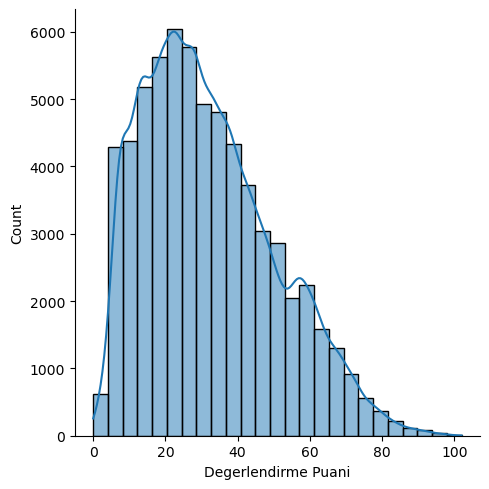

In [19]:
sns.displot(train_data['Degerlendirme Puani'],bins=25,kde=True)

In [20]:
train_data=train_data.drop(train_data[train_data['Degerlendirme Puani'].isna()].index)

In [21]:
# sns.kdeplot(train_data['Degerlendirme Puani'],fill=True);

In [22]:
# sns.kdeplot(train_data['Basvuru Yili'],fill=True);

In [23]:
# sns.boxplot(x="Basvuru Yili",y='Degerlendirme Puani',data=train_data);

**Even though 2018 is the least applied year, 2006 is the peak year for "degerlendirme puani" (target variable)**

## EDA For Categorical Columns

In [24]:
cat_cols

['Cinsiyet',
 'Dogum Tarihi',
 'Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Adi',
 'Universite Turu',
 'Burs Aliyor mu?',
 'Bölüm',
 'Universite Kacinci Sinif',
 'Universite Not Ortalamasi',
 'Lise Adi',
 'Lise Sehir',
 'Lise Turu',
 'Lise Bolumu',
 'Lise Mezuniyet Notu',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Burs Aldigi Baska Kurum',
 'Baska Kurumdan Aldigi Burs Miktari',
 'Anne Egitim Durumu',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Egitim Durumu',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Kardes Sayisi',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
 'Ingilizce Biliyor musunuz?']

### Columns with less than 10 categories

In [25]:
column_with_less_than_10_categories=find_columns_with_less_than_x_categories(train_data,cat_cols,10)

In [26]:
column_with_less_than_10_categories

['Cinsiyet',
 'Universite Turu',
 'Burs Aliyor mu?',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
 'Ingilizce Biliyor musunuz?']

In [27]:
# show_unique_values_of_columns_in_train_and_test_data(train_data,test_data,column_with_less_than_10_categories)

### Column Title Adjustments for Consistency with `test_data`

To ensure consistency and reduce potential confusion between datasets, the following columns need to be properly titled: **Cinsiyet**, **Universite Turu**, **Burs Aliyor mu?**, **Anne Sektor**, **Baba Sektor**, and **Spor Dalindaki Rolunuz Nedir?**. Standardizing these column titles will help align the `test_data` with other datasets, making the data easier to manage and reducing discrepancies during analysis. By applying clear and consistent titles, we can enhance both the accuracy of the data processing and the clarity of our workflow.


In [28]:
train_titled_cols=["Cinsiyet", "Universite Turu","Burs Aliyor mu?","Anne Sektor","Baba Sektor","Spor Dalindaki Rolunuz Nedir?"]
for col in train_titled_cols:
    train_data[col]=train_data[col].str.title()  


In [29]:
test_data["Cinsiyet"]=test_data["Cinsiyet"].str.title()  

In [30]:
# display_bar_plot_for_categorical_cols(train_data,column_with_less_than_10_categories)

In [31]:
# display_bar_plot_for_categorical_cols(test_data,column_with_less_than_10_categories)

### Mapping for `Calisma Durumu`

To align with the `test_data`, we mapped `'Emekli'` (Retired) to `'Hayır'` (No) in the **Anne Calisma Durumu** and **Baba Calisma Durumu** columns in `train_data`. This ensures consistency between both datasets.


In [32]:
calisma_durumu_map={
    'Emekli':'Hayır'
}
train_data['Anne Calisma Durumu'] = train_data['Anne Calisma Durumu'].replace(calisma_durumu_map)
train_data['Baba Calisma Durumu'] = train_data['Baba Calisma Durumu'].replace(calisma_durumu_map)


### Mapping for `Sektor` Columns

To standardize sector names between the `train` and `test` datasets, we applied the following mapping in the **Anne Sektor** (Mother's Sector) and **Baba Sektor** (Father's Sector) columns:

- `'Di̇ğer'` and `'Diğer'` mapped to `'Diğer'`
- `'0'` mapped to `'-'`

This ensures consistency across both datasets.


In [33]:
sektor_map={
     'Diğer':'Diger',
    'Di̇ğer':'Diger',
    '0':'-',
   
}
train_data['Anne Sektor'] = train_data['Anne Sektor'].replace(sektor_map)
train_data['Baba Sektor'] = train_data['Baba Sektor'].replace(sektor_map)


test_data['Anne Sektor'] = test_data['Anne Sektor'].replace(sektor_map)
test_data['Baba Sektor'] = test_data['Baba Sektor'].replace(sektor_map)

### Mapping for `Spor Dalindaki Rolunuz Nedir?`

To harmonize the roles between the `train` and `test` datasets, we applied the following mapping in the **Spor Dalindaki Rolunuz Nedir?** (Your Role in Sports) column:

- `'0'` mapped to `'-'`
- `'Kaptan'` and `'Kaptan / Li̇der'` mapped to `'Lider/Kaptan'`
- `'Diğer'` and `'Di̇ğer'` mapped to `'Diger'`
- `'Bireysel'` mapped to `'Bireysel Spor'`

This ensures that all roles are standardized for consistency across both datasets.


In [34]:
spor_dalindaki_rolunuz_nedir_map={
    '0': '-',
    'Kaptan':'Lider/Kaptan',
    'Kaptan / Li̇der':'Lider/Kaptan',
    'Diğer':'Diger',
   'Di̇ğer':'Diger',
   'Bireysel':'Bireysel Spor',
    'Takım Oyuncusu':'Takım Oyuncusu'       
}
train_data['Spor Dalindaki Rolunuz Nedir?']=train_data['Spor Dalindaki Rolunuz Nedir?'].replace(spor_dalindaki_rolunuz_nedir_map)

test_data['Spor Dalindaki Rolunuz Nedir?']=test_data['Spor Dalindaki Rolunuz Nedir?'].replace(spor_dalindaki_rolunuz_nedir_map)


### Columns with more than 10 and less than 35 categories

In [35]:
column_with_more_than_10_and_less_than_35_categories=[]
for i in cat_cols:
    if i not in column_with_less_than_10_categories and len(train_data[i].unique())<35:
        column_with_more_than_10_and_less_than_35_categories.append(i)
        

In [36]:
column_with_more_than_10_and_less_than_35_categories

['Universite Kacinci Sinif',
 'Universite Not Ortalamasi',
 'Lise Turu',
 'Lise Mezuniyet Notu',
 'Anne Egitim Durumu',
 'Baba Egitim Durumu',
 'Kardes Sayisi']

### Ordinal Mapping for Specific Columns

The following columns in the dataset require ordinal mapping to convert categorical values into a ranked numerical format:

- **Universite Kacinci Sinif** (University Year)
- **Universite Not Ortalamasi** (University GPA)
- **Lise Turu** (High School Type)
- **Lise Mezuniyet Notu** (High School Graduation Score)
- **Anne Egitim Durumu** (Mother's Education Level)
- **Baba Egitim Durumu** (Father's Education Level)
- **Kardes Sayisi** (Number of Siblings)

These mappings will ensure that the ordinal relationships between categories are preserved, allowing for more accurate analysis and modeling.


In [37]:
uni_kacinci_sinif_ordinal_mapping = {
    'Hazırlık': 0,
    'hazırlık':0,
    '0':0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    'Mezun': 7,
    'Yüksek Lisans': 7,
     'Tez': 7
}
train_data['Universite Kacinci Sinif'] = train_data['Universite Kacinci Sinif'].replace(uni_kacinci_sinif_ordinal_mapping)
test_data['Universite Kacinci Sinif'] = test_data['Universite Kacinci Sinif'].replace(uni_kacinci_sinif_ordinal_mapping)

C:\Users\Naz\AppData\Local\Temp\ipykernel_10720\2306006054.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Universite Kacinci Sinif'] = train_data['Universite Kacinci Sinif'].replace(uni_kacinci_sinif_ordinal_mapping)
C:\Users\Naz\AppData\Local\Temp\ipykernel_10720\2306006054.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Universite Kacinci Sinif'] = test_data['Universite Kacinci Sinif'].replace(uni_kacinci_sinif_ordinal_mapping)


In [38]:
uni_not_ort_map = {
    '4.00 - 3.50': 9,
    '3.50 - 4.00': 9,
    '4.0-3.5': 9,
    '4-3.5': 9,
    '3.00 - 4.00':8,
    '3.50 - 3.00': 8,
    '3.00 - 3.50': 8,
    '3.00 - 3.49': 8,
    '3.00 - 2.50': 7,
    '3.00-2.50':7,
    '3.50-3': 7,
    '2.50 - 3.00': 6,
    '2.50 -3.00': 6,
    '2.50 - 2.99': 6,
    '2.00 - 2.50': 5,
    '2.50 ve altı': 5,
    '1.80 - 2.49': 4,
    '1.00 - 2.50': 4,
    '0 - 1.79': 3,
    'Ortalama bulunmuyor': np.nan,
    'ORTALAMA BULUNMUYOR': np.nan,
     'Not ortalaması yok': np.nan,
    'Hazırlığım':np.nan
}
train_data['Universite Not Ortalamasi'] = train_data['Universite Not Ortalamasi'].replace(uni_not_ort_map)
test_data['Universite Not Ortalamasi'] = test_data['Universite Not Ortalamasi'].replace(uni_not_ort_map)

C:\Users\Naz\AppData\Local\Temp\ipykernel_10720\1555697822.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Universite Not Ortalamasi'] = train_data['Universite Not Ortalamasi'].replace(uni_not_ort_map)
C:\Users\Naz\AppData\Local\Temp\ipykernel_10720\1555697822.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Universite Not Ortalamasi'] = test_data['Universite Not Ortalamasi'].replace(uni_not_ort_map)


In [39]:
train_data['Lise Turu']=train_data['Lise Turu'].str.title()
lise_turu_map={
    'Meslek':'Meslek Lisesi',
     'Özel Lisesi':'Özel Lise',
     'Özel':'Özel Lise',
    'Devlet':'Anadolu Lisesi'
    
}
train_data['Lise Turu'] = train_data['Lise Turu'].replace(lise_turu_map)
lise_turu_map_devlet_ozel={
    'Anadolu Lisesi':'Devlet',
    'Meslek Lisesi':'Devlet',
    'Fen Lisesi':'Devlet',
     'Düz Lise':'Devlet',
    'İmam Hatip Lisesi':'Devlet',
    'Diğer':'Özel',
     'Özel Lise':'Özel'    
   
}
train_data['Lise Turu'] = train_data['Lise Turu'].replace(lise_turu_map_devlet_ozel)

In [40]:
lise_mezuniyet_notu_map = {
    '3.50-3': '50 - 74',
    '3.00 - 4.00': '75 - 100',
    '3.00-2.50': '25 - 49',
    '2.50 ve altı': '25 - 49',
    '4.00-3.50': '75 - 100',
    '3.50-3.00': '50 - 74',
    '69-55': '50 - 74',
    '100-85': '75 - 100',
    '84-70': '75 - 100',
    '54-45': '50 - 74',
    '44-0': '25 - 49',
    '75 - 100': '75 - 100',
    '50 - 75': '50 - 74',
    'not ortalaması yok': np.nan,  # Keep as is
    '25 - 50': '25 - 49',
    '0 - 25': '25 - 49',
    '50 - 74': '50 - 74',
    '25 - 49': '25 - 49',
    '0 - 24': '25 - 49'
}
train_data['Lise Mezuniyet Notu'] = train_data['Lise Mezuniyet Notu'].map(lise_mezuniyet_notu_map)
test_data['Lise Mezuniyet Notu'] = test_data['Lise Mezuniyet Notu'].map(lise_mezuniyet_notu_map)


In [41]:
lise_mezuniyet_ordinal_map={
    '50 - 74':2,
    '75 - 100' :3,
    '25 - 49':1
}
train_data['Lise Mezuniyet Notu'] = train_data['Lise Mezuniyet Notu'].map(lise_mezuniyet_ordinal_map)
test_data['Lise Mezuniyet Notu'] = test_data['Lise Mezuniyet Notu'].map(lise_mezuniyet_ordinal_map)

In [42]:
train_data['Anne Egitim Durumu']=train_data['Anne Egitim Durumu'].str.title()
train_data[ 'Baba Egitim Durumu']=train_data[ 'Baba Egitim Durumu'].str.title()

egitim_durumu_map = {
    'Üniversite': 'Üniversite',
    'Üniversite Mezunu': 'Üniversite',
    'Üni̇versi̇te': 'Üniversite',
    'İlkokul': 'İlkokul',
    'İlkokul Mezunu': 'İlkokul',
    'Lise': 'Lise',
    'Lise Mezunu': 'Lise',
    'Li̇se': 'Lise',
    'Ortaokul': 'Ortaokul',
    'Ortaokul Mezunu': 'Ortaokul',
    'Yüksek Lisans': 'Yüksek Lisans',
    'Yüksek Li̇sans':'Yüksek Lisans',
    'Yüksek Lisans / Doktora': 'Yüksek Lisans',
    'Yüksek Lisans / Doktara': 'Yüksek Lisans',
    'Doktora': 'Doktora',
    'Eğitim Yok': 'Eğitimi yok',
    'Eği̇ti̇m Yok': 'Eğitimi yok',
    'Eğitimi Yok': 'Eğitimi yok',
    '0':'Eğitimi yok'
}
train_data['Anne Egitim Durumu']=train_data['Anne Egitim Durumu'].replace(egitim_durumu_map)
train_data['Baba Egitim Durumu']=train_data['Baba Egitim Durumu'].replace(egitim_durumu_map)


In [43]:
egitim_durumu_ordinal_map={
'Eğitimi yok':0,
     'İlkokul':1,
    'Ortaokul':2,    
     'Lise' :3,
    'Üniversite' :4,
    'Yüksek Lisans':5,
    'Doktora':6
}
train_data['Anne Egitim Durumu']=train_data['Anne Egitim Durumu'].replace(egitim_durumu_ordinal_map)
train_data['Baba Egitim Durumu']=train_data['Baba Egitim Durumu'].replace(egitim_durumu_ordinal_map)
test_data['Anne Egitim Durumu']=test_data['Anne Egitim Durumu'].replace(egitim_durumu_ordinal_map)
test_data['Baba Egitim Durumu']=test_data['Baba Egitim Durumu'].replace(egitim_durumu_ordinal_map)


C:\Users\Naz\AppData\Local\Temp\ipykernel_10720\3558116154.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Anne Egitim Durumu']=train_data['Anne Egitim Durumu'].replace(egitim_durumu_ordinal_map)
C:\Users\Naz\AppData\Local\Temp\ipykernel_10720\3558116154.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Baba Egitim Durumu']=train_data['Baba Egitim Durumu'].replace(egitim_durumu_ordinal_map)
C:\Users\Naz\AppData\Local\Temp\ipykernel_10720\3558116154.py:12: FutureWarning: Downcasting behavior in `repl

In [44]:
kardes_sayisi_map={
     'Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat':'1'
}
train_data['Kardes Sayisi']=train_data['Kardes Sayisi'].replace(egitim_durumu_ordinal_map)
train_data['Kardes Sayisi'] = pd.to_numeric(train_data['Kardes Sayisi'], errors='coerce')


In [45]:
# for i in column_with_more_than_10_and_less_than_35_categories:
#     print(i)
#     print("Train Data")    
#     print(len(train_data[i].unique()))
#     print(train_data[i].unique())
#     print("Test Data")
#     print(len(test_data[i].unique()))
#     print(test_data[i].unique())
#     print("-------------")


### Columns with more than 35 categories

In [46]:
columns_with_more_than_35_categories=[]
for i in cat_cols:
    if i not in column_with_less_than_10_categories and i not in column_with_more_than_10_and_less_than_35_categories:
        columns_with_more_than_35_categories.append(i)
        

In [47]:
columns_with_more_than_35_categories

['Dogum Tarihi',
 'Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Adi',
 'Bölüm',
 'Lise Adi',
 'Lise Sehir',
 'Lise Bolumu',
 'Burs Aldigi Baska Kurum',
 'Baska Kurumdan Aldigi Burs Miktari']

In [48]:
# for i in columns_with_more_than_35_categories:
#     print(i)
#     print("Train Data")    
#     print(len(train_data[i].unique()))
#     print("Test Data")
#     print(len(test_data[i].unique()))
#     print("----------------------------------------------------------------")

### Handling `Doğum Tarihi` (Birth Date) Column

The **Doğum Tarihi** (Birth Date) column contains both English and Turkish date formats, with some months written in Turkish (e.g., "Mayis" for May, "Kasim" for November). To standardize the data and ensure consistency, we will first translate the Turkish month names into English. After that, the dates will be converted into a uniform format (e.g., `YYYY-MM-DD`). 

Once this is done, we will calculate the age of each individual based on their birthdate, ensuring that this column is ready for further analysis.


In [49]:
col="Dogum Tarihi"

In [50]:
month_set=set()
train_data[col].apply(lambda x: month_set.add(re.findall(r'[a-zA-Z]+', x)[0]) if isinstance(x, str) and re.findall(r'[a-zA-Z]+', x) else x)
month_list = list(month_set)


In [51]:
print(month_list)

['Feb', 'Aug', 'Kasim', 'Oct', 'Jul', 'Aralik', 'Nisan', 'Apr', 'Jan', 'Mar', 'Sep', 'Mayis', 'Jun']


In [52]:
month_map={
    'Aralik':'December',
    'Kasim':'November',
    'Mayis': 'May',
    'Jun':'June',
    'Aug': 'August',
    'Mar':'March',
    'Jan':'January',
    'Oct':'October',
    'Feb':'February',
    'Jul': 'July',
    'Sep':'September',
    'Apr':'April',
    'Nisan':'April'
}

In [53]:
train_data[col] = train_data[col].apply(replace_month)

In [54]:
train_data[col] = train_data[col].apply(replace_birth_dates)
test_data[col] = test_data[col].apply(replace_birth_dates)

In [55]:
# Apply the function again
train_data['Yas'] = train_data[col].apply(find_age)
test_data['Yas'] = test_data[col].apply(find_age)

##### Removing the Birth Date Column

Since we have derived an **`age`** column from the birth date information, the **`birth date`** column can now be removed. 



In [56]:
col="Dogum Tarihi"
train_data=train_data.drop(columns=col)
test_data=test_data.drop(columns=col)

#### 1. `match_cities_in_train_data_with_test_data`
This function standardizes and matches city names between two datasets: `train_data` and `test_data`.

- **Step 1**: Corrects spelling mistakes in city names (like Istanbul and Izmir) using the `replace_izmir_istanbul_cities_with_correct_spelling` function.
- **Step 2**: Removes non-alphabetic characters (like '-', '/', ',') from `train_data` and matches cleaned names with `test_data` using `remove_non_alpha_characters_from_data_and_match_with_test_data`.
- **Step 3**: Maps Istanbul districts to "İstanbul" using the `map_istanbul_districts` function.
- **Step 4**: Matches similar city names between `train_data` and `test_data` using fuzzy matching in the `match_strings_with_its_similars` function.

##### 2. `replace_izmir_istanbul_cities_with_correct_spelling`
Corrects spelling variations of major city names (like 'Istanbul' and 'Izmir') by replacing them with their standardized Turkish forms ('İstanbul', 'İzmir').

##### 3. `remove_non_alpha_characters_from_data_and_match_with_test_data`
Removes non-alphabetic characters (such as `-`, `/`, `,`) from city names in `train_data`. Then, it splits the city names and matches each part with values in `test_data`.

##### 4. `map_istanbul_districts`
Maps Istanbul districts in `train_data` to the city name "İstanbul". It checks whether a string is one of the districts and replaces it accordingly.

##### 5. `match_strings_with_its_similars`
Uses fuzzy matching to find the closest match for each city name in `train_data` from `test_data`. If no close match is found (i.e., similarity score below 50), the string is replaced with "Diğer" (Other). Otherwise, the closest match is assigned to `train_data`.


In [57]:
col='Dogum Yeri'
train_data[col]=train_data[col].str.title()

In [58]:
istanbul_districts = [
    "Adalar", "Arnavutköy", "Ataşehir", "Avcılar", "Bağcılar", "Bahçelievler", 
    "Bakırköy", "Başakşehir", "Bayrampaşa", "Beşiktaş", "Beykoz", "Beylikdüzü", 
    "Beyoğlu", "Büyükçekmece", "Çatalca", "Çekmeköy", "Esenler", "Esenyurt", 
    "Eyüpsultan", "Fatih", "Gaziosmanpaşa", "Güngören", "Kadıköy", "Kağıthane", 
    "Kartal", "Küçükçekmece", "Maltepe", "Pendik", "Sancaktepe", "Sarıyer", 
    "Şile", "Silivri", "Şişli", "Sultanbeyli", "Sultangazi", "Tuzla", "Ümraniye", 
    "Üsküdar", "Zeytinburnu"]

In [59]:
train_data=match_cities_in_train_data_with_test_data(train_data,test_data,col)       

In [60]:
col='Ikametgah Sehri'
train_data[col]=train_data[col].str.title()

In [61]:
train_data=match_cities_in_train_data_with_test_data(train_data,test_data,col)       

In [62]:
col='Universite Adi'
train_data[col]=train_data[col].str.title()


In [63]:
train_data=map_other(train_data,col)
test_data=map_other(test_data,col)

In [64]:
matched_texts,train_data=match_strings_with_its_similars(train_data,col,test_data[col].unique().tolist())

In [65]:
col='Bölüm'
train_data[col]=train_data[col].str.title()


In [66]:
train_data=map_other(train_data,col)
test_data=map_other(test_data,col)

In [67]:
matched_texts,train_data=match_strings_with_its_similars(train_data,col,test_data[col].unique().tolist())

In [68]:
# for i in matched_texts:
#     if i[1][1]!=100:
#         print(i)

#### Function: `call_replace_methods`

This function orchestrates a series of string replacement operations on a specified column of a dataset. It integrates multiple replacement methods to standardize data entries.

#### Parameters:
- **data**: The dataset (e.g., DataFrame) that contains the column to be modified.
- **col**: The name of the column in which string replacements will occur.
- **different_pairs**: A list of tuples containing pairs of values for replacement where each tuple consists of an `old_value` (to be replaced) and a `new_value` (replacement).
- **same_pairs**: A list of values that should remain unchanged or be standardized.

#### Process:
1. **Different Substring Replacement**: 
   - Calls `replace_string_with_different_substring` to replace specified `old_value` substrings with `new_value` in the column.
   
2. **Same Substring Replacement**:
   - Calls `replace_string_with_same_substring` to replace specific substrings with identical values.
   
3. **Other Value Handling**:
   - Calls `replace_string_with_other` to change any remaining values in the column that do not match the specified `same_pairs` to "Diger,".
#### Returns:
- The modified dataset after applying all replacement methods.


In [69]:
col='Lise Adi'
train_data[col]=train_data[col].str.title()
test_data[col]=test_data[col].str.title()

In [70]:
train_data=map_other(train_data,col)
test_data=map_other(test_data,col)

In [71]:
# different_pairs-> (old_value, new_value)
different_pairs = [('Imam', 'İmam'), ('Açik', 'Açık')]
same_pairs=["Anadolu" ,"Meslek","Fen","Temel","Açık","Kolej","Asker","İmam","Sosyal","Sanat","Özel","Kız","Erkek"]

In [72]:
train_data=call_replace_methods(train_data,col,different_pairs,same_pairs)
test_data=call_replace_methods(test_data,col,different_pairs,same_pairs)

In [73]:
col='Lise Sehir'
train_data[col]=train_data[col].str.title()

In [74]:
train_data=match_cities_in_train_data_with_test_data(train_data,test_data,col)       

In [75]:
col='Lise Bolumu'
train_data[col]=train_data[col].str.title()
test_data[col]=test_data[col].str.title()

In [76]:
# train_data[col].unique()

In [77]:
train_data=map_other(train_data,col)
test_data=map_other(test_data,col)

In [78]:
train_data=replace_high_school_departments_with_correct_versions(train_data, col)

In [79]:
matched_texts,train_data=match_strings_with_its_similars(train_data,col,test_data[col].unique().tolist())

### Dropping Columns with Excessive Missing Data

The columns **`Burs Aldigi Baska Kurum`** (Other Institution Scholarship) and **`Baska Kurumdan Aldigi Burs Miktari`** (Amount of Scholarship from Other Institution) were removed from the dataset due to a high percentage of missing values. This decision was made to maintain data quality and streamline analysis.

If these columns are later deemed essential for specific analyses, they can be reintroduced or considered in future data processing stages.


In [80]:
train_dropped_columns=['Burs Aldigi Baska Kurum','Baska Kurumdan Aldigi Burs Miktari']
train_data=train_data.drop(columns=train_dropped_columns)
test_data=test_data.drop(columns=train_dropped_columns)

## Checking Categorical Columns Before Data Manipulation

In [81]:
# check_categorical_columns(train_data,test_data,column_with_less_than_10_categories)

In [82]:
# check_categorical_columns(train_data,test_data,column_with_more_than_10_and_less_than_35_categories)

In [83]:
    # for i in columns_with_more_than_35_categories:
    #     print(i)    
    #     print(len(train_data[i].unique()))
    #     print(len(test_data[i].unique()))

## Data Manipulation

### Imputation of Missing Values

To handle missing values in our dataset, we used two main imputation strategies based on the nature of each column:

1. **Mode-based Imputation**: For categorical columns and certain ordinal values, missing entries were filled with the **mode (most frequent value)** within each column. This method is useful for columns where the most common value likely represents a default or typical answer. Here are the columns where mode-based imputation was applied:
   - `Universite Adi`
   - `Baska Bir Kurumdan Burs Aliyor mu?`
   - `Universite Turu`
   - `Universite Kacinci Sinif`
   - `Lise Turu`
   - `Profesyonel Bir Spor Daliyla Mesgul musunuz?`
   - `Kardes Sayisi`
   - `Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?`
   - `Lise Mezuniyet Notu`
   - `Universite Not Ortalamasi`
   - `Anne Calisma Durumu`
   - `Baba Calisma Durumu`
   - `Girisimcilikle Ilgili Deneyiminiz Var Mi?`
   - `Aktif olarak bir STK üyesi misiniz?`

2. **Custom Value Imputation**: For columns where a specific value would best represent missing information, custom values were used. For example, `Cinsiyet` (Gender) is filled with "Belirtmek istemiyorum" ("Prefer not to say"), and `Lise Bolumu` (High School Department) is filled with "Diger" ("Other"). Here are the columns and their corresponding custom values:
   - `Cinsiyet` : "Belirtmek istemiyorum"
   - `Bölüm` : "Diger"
   - `Anne Egitim Durumu` : 0
   - `Dogum Yeri` : "Diger"
   - `Baba Egitim Durumu` : 0
   - `Lise Bolumu` : "Diger"
   - `Lise Sehir` : "Diger"
   - `Ikametgah Sehri` : "Diger"
   - `Baba Sektor` : "-"
   - `Spor Dalindaki Rolunuz Nedir?` : "-"
   - `Anne Sektor` : "-"

3. **Mode Imputation and Threshold Adjustment for `Yas` (Age)**: Missing values in the `Yas` column were imputed using the mode, and any ages greater than 50 (considered outliers) were replaced with the mode. This approach ensures the data remains within a realistic range for analysis.

Using these imputation techniques helps maintain data consistency and provides more accurate results in subsequent analyses or modeling.


In [84]:
mode_fill_columns = [
    'Universite Adi', 'Baska Bir Kurumdan Burs Aliyor mu?', 'Universite Turu', 
    'Universite Kacinci Sinif', 'Lise Turu', 'Profesyonel Bir Spor Daliyla Mesgul musunuz?', 
    'Kardes Sayisi', 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 
    'Lise Mezuniyet Notu', 'Universite Not Ortalamasi', 'Anne Calisma Durumu', 
    'Baba Calisma Durumu', 'Girisimcilikle Ilgili Deneyiminiz Var Mi?','Ingilizce Biliyor musunuz?' ,
    'Aktif olarak bir STK üyesi misiniz?']

for col in mode_fill_columns:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])


In [85]:
custom_fill_values = {
    'Cinsiyet': 'Belirtmek Istemiyorum',
    'Bölüm': 'Diger',
    'Anne Egitim Durumu': 0,
    'Dogum Yeri': 'Diger',
    'Baba Egitim Durumu': 0,
    'Lise Bolumu': 'Diger',
    'Lise Sehir': 'Diger',
    'Ikametgah Sehri': 'Diger',
    'Baba Sektor': '-',
    'Spor Dalindaki Rolunuz Nedir?': '-',
    'Anne Sektor': '-'}

for col, value in custom_fill_values.items():
    train_data[col] = train_data[col].fillna(value)

# Mode imputation for 'Yas'
yas_mode = train_data['Yas'].mode()[0]
train_data['Yas'] = train_data['Yas'].fillna(yas_mode)
train_data.loc[train_data['Yas'] > 50, 'Yas'] = yas_mode

In [86]:
col="Universite Not Ortalamasi"
test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

yas_mode = test_data['Yas'].mode()[0]
test_data['Yas'] = test_data['Yas'].fillna(yas_mode)
test_data.loc[test_data['Yas'] > 50, 'Yas'] = yas_mode

In [87]:
#train_data.isnull().sum().sort_values(ascending=True)

In [88]:
# test_data.isnull().sum().sort_values(ascending=True)

## Encoding Data

In [89]:
cat_cols_after_manipulation=train_data.select_dtypes('object').columns.tolist()

In [90]:
num_cols_after_manipulation=train_data.select_dtypes(np.number).columns.tolist()

In [91]:
num_cols_after_manipulation

['Basvuru Yili',
 'Degerlendirme Puani',
 'Universite Kacinci Sinif',
 'Universite Not Ortalamasi',
 'Lise Mezuniyet Notu',
 'Anne Egitim Durumu',
 'Baba Egitim Durumu',
 'Kardes Sayisi',
 'Yas']

### Encoding Strategy for Categorical Variables

To prepare the dataset for machine learning, we use different encoding methods based on the nature and uniqueness of the categorical variables. This approach ensures the features are compatible with the model and that the encoding choice aligns with the specific characteristics of each variable. Below is a breakdown of the encoding strategies applied:

1. **One-Hot Encoding**  
   Columns with a limited number of distinct categories, such as gender or specific roles, benefit from one-hot encoding, which creates binary columns for each unique value. This is ideal for nominal categories without inherent order. The following columns are one-hot encoded:
   
   - `Cinsiyet`
   - `Lise Bolumu`
   - `Anne Sektor`
   - `Baba Sektor`
   - `Spor Dalindaki Rolunuz Nedir?`

2. **Label Encoding**  
   Ordinal categories or those with a small number of distinct values are label encoded. This method assigns an integer to each category, conserving dimensionality for features with a potential hierarchy or small unique set. Label encoding is applied to:

   - `Universite Turu`
   - `Burs Aliyor mu?`
   - `Lise Turu`
   - `Baska Bir Kurumdan Burs Aliyor mu?`
   - `Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?`
   - `Profesyonel Bir Spor Daliyla Mesgul musunuz?`
   - `Aktif olarak bir STK üyesi misiniz?`
   - `Girisimcilikle Ilgili Deneyiminiz Var Mi?`
   - `Anne Calisma Durumu`
   - `Baba Calisma Durumu`
   - `Ingilizce Biliyor musunuz?`

3. **Target Encoding**  
   High-cardinality categorical variables, such as location or university names, are target encoded. This technique assigns a numerical value based on the target variable's mean for each category, which helps avoid the high-dimensionality issue associated with one-hot encoding. Target encoding is used for:

   - `Dogum Yeri`
   - `Ikametgah Sehri`
   - `Universite Adi`
   - `Bölüm`
   - `Lise Adi`
   - `Lise Sehir`

By using this tailored approach, the model can leverage each feature effectively while minimizing the risk of dimensionality issues and overfitting.


In [92]:
one_hot_encoding_columns=["Cinsiyet","Lise Bolumu","Anne Sektor","Baba Sektor","Spor Dalindaki Rolunuz Nedir?"]

label_encoding_columns=["Universite Turu","Burs Aliyor mu?","Lise Turu",
                        "Baska Bir Kurumdan Burs Aliyor mu?","Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?",
                       "Profesyonel Bir Spor Daliyla Mesgul musunuz?","Aktif olarak bir STK üyesi misiniz?","Girisimcilikle Ilgili Deneyiminiz Var Mi?",                        
                       "Anne Calisma Durumu","Baba Calisma Durumu","Girisimcilikle Ilgili Deneyiminiz Var Mi?" ,'Ingilizce Biliyor musunuz?'          ]

target_encoding_columns=["Dogum Yeri","Ikametgah Sehri","Universite Adi","Bölüm",
       "Lise Adi","Lise Sehir"]

In [93]:
train_data = pd.get_dummies(train_data, columns=one_hot_encoding_columns)
test_data = pd.get_dummies(test_data, columns=one_hot_encoding_columns)


In [94]:
label_encoder =preprocessing.LabelEncoder() 
  
for column in label_encoding_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.fit_transform(test_data[column])

In [95]:

# Initialize the target encoder
encoder = TargetEncoder(cols=target_encoding_columns)

# Fit the encoder on the training data
train_data[target_encoding_columns] = encoder.fit_transform(train_data[target_encoding_columns], train_data['Degerlendirme Puani'])

# Transform the test data without fitting again (using the same mapping as training)
test_data[target_encoding_columns] = encoder.transform(test_data[target_encoding_columns])


In [96]:
missing_in_test = set(train_data.columns) - set(test_data.columns)
missing_in_test

{'Degerlendirme Puani', 'Lise Bolumu_Diger'}

#### Handling the "Diger" Category in the `Lise Bolumu` Column

During model training and prediction, an issue was observed: rows labeled as **"Diger"** in the training set but absent in the test set caused errors when performing one-hot encoding, as this category was not represented in the test data.

To resolve this, rows with "Diger" in the `Lise Bolumu` column will be removed from the training data. This step eliminates the discrepancy, ensuring smooth one-hot encoding and more reliable predictions.

In [97]:
train_data=train_data.drop(columns=["Lise Bolumu_Diger"])

## Splitting Data

In [98]:
X = train_data.drop(['Degerlendirme Puani'], axis=1)  # Features
y = train_data['Degerlendirme Puani']  # Target

In [99]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

TRAIN: [    0     1     2 ... 65121 65122 65123] TEST: [   39    52    54 ... 65090 65103 65111]
TRAIN: [    0     1     2 ... 65121 65122 65123] TEST: [    4     6     7 ... 65086 65094 65115]
TRAIN: [    0     1     2 ... 65121 65122 65123] TEST: [   31    38    49 ... 65081 65088 65106]
TRAIN: [    0     2     4 ... 65121 65122 65123] TEST: [    1     3    11 ... 65082 65105 65108]
TRAIN: [    1     2     3 ... 65121 65122 65123] TEST: [    0    17    25 ... 65107 65113 65118]
TRAIN: [    0     1     2 ... 65119 65120 65123] TEST: [    8    14    29 ... 65110 65121 65122]
TRAIN: [    0     1     2 ... 65120 65121 65122] TEST: [   18    19    24 ... 65104 65112 65123]
TRAIN: [    0     1     2 ... 65121 65122 65123] TEST: [    5    15    20 ... 65116 65117 65119]
TRAIN: [    0     1     3 ... 65121 65122 65123] TEST: [    2    10    12 ... 65067 65091 65101]
TRAIN: [    0     1     2 ... 65121 65122 65123] TEST: [    9    55    60 ... 65092 65093 65120]


In [100]:
# Initialize variables to track the best model
best_model = None
best_rmse = float('inf')

# Initialize the submission DataFrame with 'id' column
submission_df = pd.DataFrame()
submission_df['id'] = test_data.index  # 'id' column is created from the test data index


## Defining Models

In [101]:
# Define your models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Least Angle Regression': Lars(),
    'Lasso Least Angle Regression': LassoLars(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K Neighbors Regressor': KNeighborsRegressor(),
    'Huber Regressor': HuberRegressor(),
    'Orthogonal Matching Pursuit': OrthogonalMatchingPursuit(),
    'Dummy Regressor': DummyRegressor(strategy='mean'),
    'Extreme Gradient Boosting': xgb.XGBRegressor(),
    'Light Gradient Boosting Machine': lgb.LGBMRegressor(),
    'CatBoost Regressor': CatBoostRegressor(learning_rate=0.1, depth=6, iterations=500, verbose=0),
    'Hist Gradient Boosting Regressor': HistGradientBoostingRegressor()
}

## Evaluating Models

In [102]:
# Iterate over models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    # Predict on validation set
    val_predictions = model.predict(X_val)
    val_rmse = mean_squared_error(y_val, val_predictions, squared=False)
    print(f"{model_name} RMSE: {val_rmse}")
    
    # Track the best model
    if val_rmse < best_rmse:
        best_rmse = val_rmse
        best_model = model

Training Linear Regression...
Linear Regression RMSE: 10.394751748754128
Training Ridge Regression...
Ridge Regression RMSE: 10.394732970119827
Training Lasso Regression...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

Lasso Regression RMSE: 11.61476415741893
Training Elastic Net...
Elastic Net RMSE: 13.482215481841212
Training Bayesian Ridge...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Bayesian Ridge RMSE: 10.394631700272756
Training Least Angle Regression...
Least Angle Regression RMSE: 12.099313754372309
Training Lasso Least Angle Regression...
Lasso Least Angle Regression RMSE: 11.614922600014665
Training Gradient Boosting Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor RMSE: 7.148397912497706
Training Random Forest Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regressor RMSE: 6.761071528456804
Training Extra Trees Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Extra Trees Regressor RMSE: 6.915150007322437
Training AdaBoost Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


AdaBoost Regressor RMSE: 10.701951245730047
Training Decision Tree Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor RMSE: 9.558336341215119
Training K Neighbors Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K Neighbors Regressor RMSE: 14.531530363071699
Training Huber Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWar

Huber Regressor RMSE: 11.52600583407114
Training Orthogonal Matching Pursuit...
Orthogonal Matching Pursuit RMSE: 13.984000451065445
Training Dummy Regressor...
Dummy Regressor RMSE: 18.20466681598533
Training Extreme Gradient Boosting...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Extreme Gradient Boosting RMSE: 6.641638610418221
Training Light Gradient Boosting Machine...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 58612, number of used features: 45
[LightGBM] [Info] Start training from score 32.079915


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Light Gradient Boosting Machine RMSE: 6.5989291224895394
Training CatBoost Regressor...


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoost Regressor RMSE: 6.4887658655013984
Training Hist Gradient Boosting Regressor...
Hist Gradient Boosting Regressor RMSE: 6.588976579689285


C:\Users\Naz\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [103]:
best_model

## Predicting Test Data

In [104]:
# Predict on test data using the best model
test_predictions = best_model.predict(test_data)

# Add predictions to submission DataFrame
submission_df['Degerlendirme Puani'] = test_predictions

# Save to CSV with the required format
submission_df[['id', 'Degerlendirme Puani']].to_csv('submission_predictions.csv', index=False)

print("Submission file created in the correct format.")

Submission file created in the correct format.
